# we will analyze the daily changed for VIX,VXXBEN,UVXY,SPY, and first to 4th month futures

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
vixx_Data = pd.read_csv("vixDataUpdated", index_col="Date")

In [4]:
vixx_Data.index = pd.DatetimeIndex(vixx_Data.index)

In [5]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 18 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
VXXBEN daily          3245 non-null float64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
dtypes: float64(16), int64(2)
memory usage: 481.8 KB


## we will calculate the simple moving ,and Exponential Weighted Moving average (30, 60 days) of UVXY  along with its changes over the period 

In [6]:
vixx_Data["UVXY_MA_30"] = vixx_Data.rolling(30)["UVXY"].mean()

In [7]:
vixx_Data["UVXY_MA_60"] = vixx_Data.rolling(60)["UVXY"].mean()

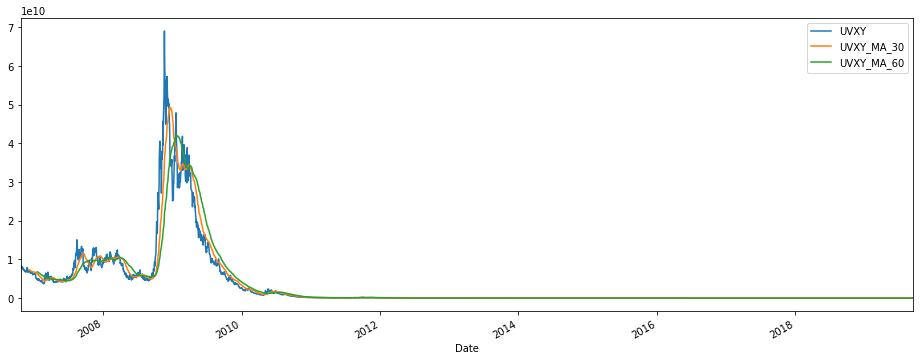

In [8]:
vixx_Data[["UVXY", "UVXY_MA_30", "UVXY_MA_60"]].plot(figsize = (16,6))

# EWMA

In [9]:
vixx_Data["UVXY-EWMA-30"] = vixx_Data["UVXY"].ewm(span=30).mean()

In [10]:
vixx_Data["UVXY-EWMA-60"] = vixx_Data["UVXY"].ewm(span=60).mean()

In [11]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 22 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
VXXBEN daily          3245 non-null float64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
UVXY_MA_30            3217 non-null float64
UVXY_MA_60            3187 non-null float64

# ETS Model (Error, Trend,Seasonal)

In [12]:
Ets_result = seasonal_decompose(vixx_Data["UVXY"], model="multiplicative", freq=12)

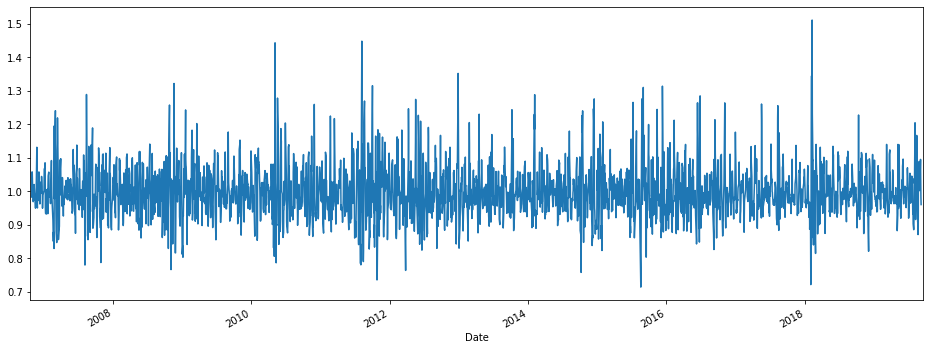

In [13]:
Ets_result.resid.plot(figsize = (16,6))

In [20]:
futures_data = vixx_Data[["UX1_daily changes", 'UX2_daily changes',"UX3_daily changes", "UX4_daily changes"]].dropna()

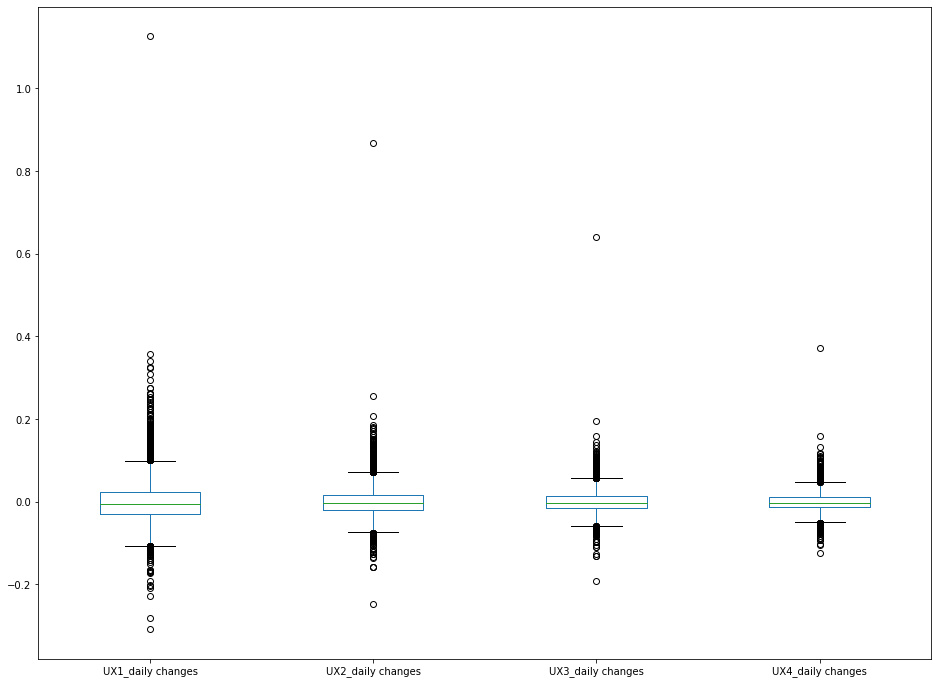

In [21]:
futures_data.plot(kind = "box", figsize = (16,12))

In [23]:
x_con = sm.add_constant(futures_data["UX1_daily changes"])
model = sm.OLS(futures_data["UX4_daily changes"], x_con).fit()

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:              OLS               Adj. R-squared:     0.732      
Dependent Variable: UX4_daily changes AIC:                -18930.4961
Date:               2020-01-17 05:25  BIC:                -18918.3263
No. Observations:   3245              Log-Likelihood:     9467.2     
Df Model:           1                 F-statistic:        8852.      
Df Residuals:       3243              Prob (F-statistic): 0.00       
R-squared:          0.732             Scale:              0.00017128 
----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
----------------------------------------------------------------------
const              -0.0002    0.0002  -1.0589  0.2897  -0.0007  0.0002
UX1_daily changes   0.3622    0.0039  94.0837  0.0000   0.3547  0.3698
---------------------------------------------------------------------
Omnibus:               503.740       Durbin-Watson:          2.134   
Prob(Omnibus):         0.000         Jarque-Bera (JB):       6884.658
Skew:                  -0.263        Prob(JB):               0.000   
Kurtosis:              10.116        Condition No.:          17      
=====================================================================

"""

In [26]:
results = stats.linregress(futures_data["UX1_daily changes"], futures_data["UX4_daily changes"])

In [27]:
results

LinregressResult(slope=0.36223357315405014, intercept=-0.00024338316859007648, rvalue=0.8554923569369581, pvalue=0.0, stderr=0.003850118401197198)

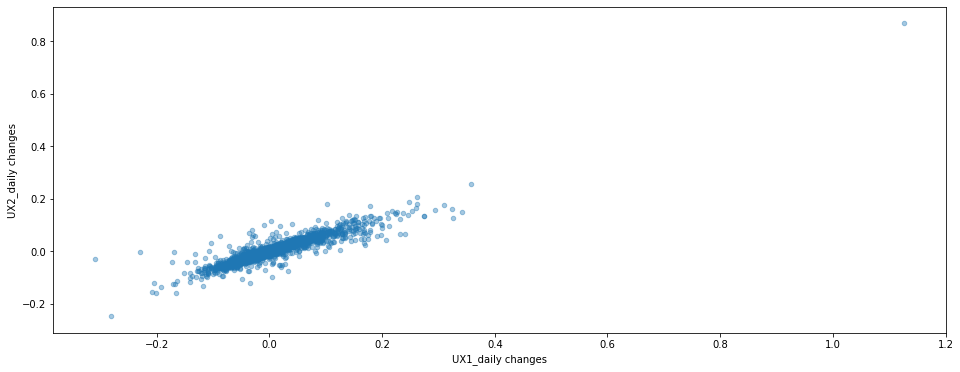

In [30]:
futures_data.plot(kind = "scatter", x = "UX1_daily changes", y = "UX2_daily changes", figsize = (16,6), alpha = 0.4)
plt.pl